In [10]:
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,diagnosis,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1.0,0.360927,0.316195,0.245670,0.33910,0.328167,0.301037,0.418033,0.362807
1,1.0,0.360927,0.566937,0.928665,0.33910,0.328167,0.301037,0.473547,0.362807
2,1.0,0.360927,0.316195,0.245670,0.33910,0.328167,0.301037,0.418033,0.362807
3,1.0,0.360927,0.316195,0.245670,0.32872,0.357472,0.092140,0.418033,0.362807
4,1.0,0.360927,0.316195,0.245670,0.33910,0.328167,0.301037,0.418033,0.362807


In [6]:
df_train = df.head(int(0.8*len(df)))
df_hold = df.tail(int(0.2*len(df)))

In [7]:
sample_20 = df_train.sample(int(0.2*len(df_train)), random_state=2)
sample_40 = df_train.sample(int(0.4*len(df_train)), random_state=2)
sample_60 = df_train.sample(int(0.6*len(df_train)), random_state=2)
sample_80 = df_train.sample(int(0.8*len(df_train)), random_state=2)

In [8]:
sm = from_pandas(df_train)
sm_20 = from_pandas(sample_20)
sm_40 = from_pandas(sample_40)
sm_60 = from_pandas(sample_60)
sm_80 = from_pandas(sample_80)

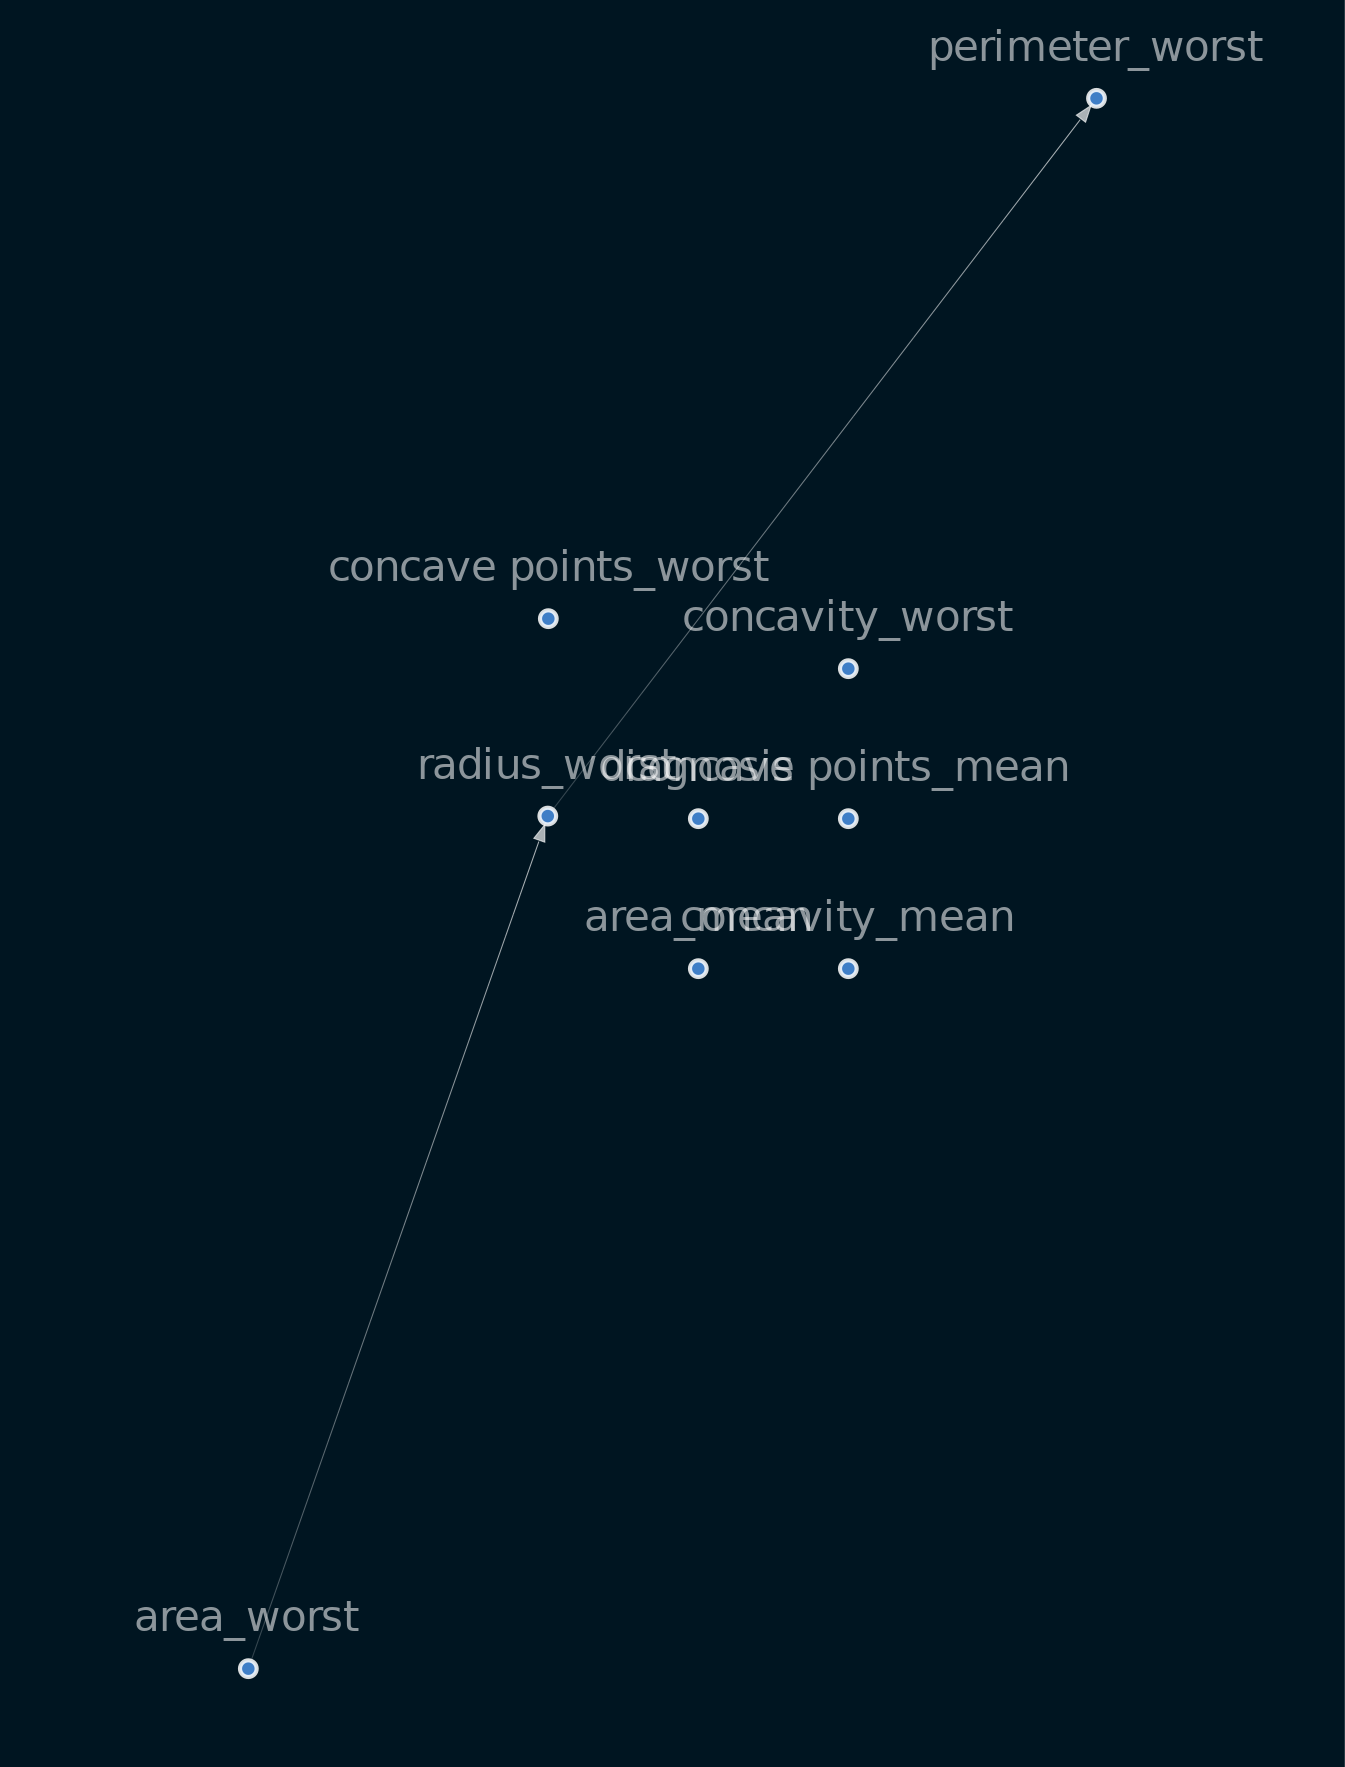

In [13]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "3"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [ ]:
def jaccard_similarity(g, h, th1, th2):
    g.remove_edges_below_threshold(th1)
    h.remove_edges_below_threshold(th2)
    a = g.edges
    b = h.edges
    i = set(a).intersection(b)
    return round(len(i) / (len(a) + len(b) - len(i)),3)